In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def detect_vertical_lines(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    edges_img = cv2.Canny(gray_img, 50, 250,  apertureSize=3)
    #plt.imshow(edges_img, "gray")
    
    min_line_length = 200
    
    lines = cv2.HoughLinesP(image=edges_img, rho=1, theta=np.pi/180, threshold=10, lines=np.array([]),
                           minLineLength=min_line_length, maxLineGap=10)
    
    verticals = []
    
    #[x1 y1 x2 y2]
    for entry in lines:
        line = entry[0]
        
        start_x = line[0]
        start_y = line[1]
        
        end_x = line[2]
        end_y = line[3]
        
        if(start_x == end_x):
            verticals.append([start_x, start_y, end_x, end_y])

    center = img.shape[1] / 2
    
    left_ones = []
    right_ones = []
    
    for vert in verticals:
        if center - vert[0] > 0:
            left_ones.append(vert)
        else:
            right_ones.append(vert)
            
    left = left_ones[0]
    for vert in left_ones:
        if vert[0] < left[0]:
            left = vert
    
    right = right_ones[0]
    for vert in right_ones:
        if vert[0] > right[0]:
            right = vert


    return [left, right]

In [3]:
def process_video(video_path):
    
    left = []
    right = []
    hits = 0
    frame_num = 0
    frame_pause = 0
    
    cap = cv2.VideoCapture(video_path)
    cap.set(1, frame_num)
    
    while True:
        frame_num += 1
        
        if frame_pause > 0:
            frame_pause = frame_pause - 1
        
        ret_val, frame = cap.read()

        if not ret_val:
            break

        if frame_num == 1:
            verticals = detect_vertical_lines(frame)
            print(verticals)
            left = verticals[0]
            right = verticals[1]

        frame_gray = frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #plt.imshow(frame_gray, "gray")

        ret, frame_bin = cv2.threshold(frame_gray, 150, 255, cv2.THRESH_BINARY)
        plt.imshow(frame_bin, "gray")
        return 3
        
        contours, _ = cv2.findContours(frame_bin.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for cont in contours:
            ((x, y), radius) = cv2.minEnclosingCircle(cont)
            
            if radius < 5 and radius > 3.6:
                
                if x >= right[0] - 19 and frame_pause == 0:
                    hits = hits + 1
                    frame_pause = 3
                    
                
                if x <= left[0] + 19 and frame_pause == 0:
                    hits = hits + 1
                    frame_pause = 3
                    
    print(hits)
    return hits


Processing video 1
[[288, 580, 288, 108], [671, 508, 671, 108]]
Processing video 2
[[288, 580, 288, 108], [672, 501, 672, 120]]
Processing video 3
[[288, 580, 288, 108], [671, 505, 671, 108]]
Processing video 4
[[288, 579, 288, 108], [671, 505, 671, 108]]
Processing video 5
[[288, 580, 288, 108], [671, 509, 671, 108]]
Processing video 6
[[288, 580, 288, 108], [671, 505, 671, 108]]
Processing video 7
[[288, 580, 288, 108], [671, 505, 671, 108]]
Processing video 8
[[288, 580, 288, 213], [671, 505, 671, 108]]
Processing video 9
[[288, 580, 288, 108], [671, 505, 671, 108]]
Processing video 10
[[288, 580, 288, 108], [671, 508, 671, 108]]
Actual vs calculated: 
[7, 18, 21, 18, 10, 32, 13, 15, 14, 24]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Mean absolute error : 14.2


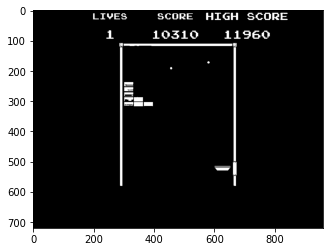

In [4]:
def main():
    calculated = []
    actual = []
    
    res = open("videos/res.txt", 'r')
    res.readline()
    
    while True:
        line = res.readline()
        
        if not line:
            break
        
        num = line.split(",")[1].strip()
        actual.append(int(num))
    
    res.close()
    
    for i in range(1, 11):
        print("Processing video " + str(i))
        hits = process_video("videos/video" + str(i) + ".mp4")
        calculated.append(hits)
        
    print("Actual vs calculated: ")
    print(actual)
    print(calculated)

    n = 10
    sum = 0

    for i in range(n):
        sum += abs(actual[i] - calculated[i])

    error = sum/n
    print("Mean absolute error : " + str(error))

    
main()